In [1]:
# Source: https://medium.com/@dhanrajpawar798/scraping-data-from-google-maps-using-a-python-12091f367d38
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys 
from bs4 import BeautifulSoup
import time, io, os, re
import pandas as pd
import numpy as np

In [2]:
#browser = webdriver.Chrome("C:/Users/DChen/OneDrive - lanecouncilofgovernments/software/chromedriver_win32/chromedriver.exe")
browser = webdriver.Chrome('/Users/dongmeichen/OneDrive - lanecouncilofgovernments/software/chromedriver')

In [3]:
browser.get('https://www.google.com/maps/search/Groceries')

In [4]:
actions = ActionChains(browser)

In [5]:
browser.maximize_window()
time.sleep(3)
content = browser.find_element_by_class_name('scrollable-show').click()

In [6]:
htmlstring = browser.page_source
afterstring=""
n = 10
for i in range(n):
    print(i)
    afterstring = htmlstring
    actions.send_keys(Keys.PAGE_DOWN).perform()
    htmlstring = browser.page_source
    if (i > n):
        print ("ended scraping crack test one")
        actions.send_keys(Keys.PAGE_DOWN).perform()
        htmlstring = browser.page_source
        if (i > n):
            print ("--Scrapping End--")
            break
    time.sleep(3)

0
1
2
3
4
5
6
7
8
9


'<html itemscope="" itemtype="http://schema.org/Place" lang="en" jstcache="0"><head> <link href="/maps/preview/opensearch.xml?hl=en" title="Google Maps" rel="search" type="application/opensearchdescription+xml"> <title>Neighborhood Market - Google Maps</title> <meta content=" Find local businesses, view maps and get driving directions in Google Maps. " name="Description">  <meta content="initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" name="viewport"> <meta content="chrome=1" http-equiv="X-UA-Compatible"> <meta content="notranslate" name="google"> <meta content="origin" name="referrer">   <meta content="Groceries" itemprop="name"> <meta content="Groceries" property="og:title"> <meta content="https://maps.google.com/maps/api/staticmap?center=44.0675403%2C-123.11689195&amp;zoom=11&amp;size=200x200&amp;markers=44.0489731%2C-123.1433048%7C44.0585655%2C-123.1020695%7C44.0535495%2C-123.1057608%7C44.0479974%2C-123.1203738%7C44.0414784%2C-123.1168047%7C44.055898%2C-1
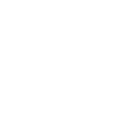
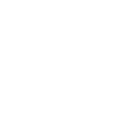

In [7]:
htmlstring

In [8]:
soup = BeautifulSoup(htmlstring, "html.parser")
meta_tags = soup.findAll('meta')
meta_tags
url = ''
for tag in meta_tags:
    if tag['content'].startswith('https:'):
        url = tag['content']
parts = url.split('&')

In [9]:
markers = [part for part in parts if part.startswith('markers')][0].replace('markers=', '')
markers

'44.0489731%2C-123.1433048%7C44.0585655%2C-123.1020695%7C44.0535495%2C-123.1057608%7C44.0479974%2C-123.1203738%7C44.0414784%2C-123.1168047%7C44.055898%2C-123.1092664%7C44.0661756%2C-123.1438191%7C44.051127%2C-123.109704%7C44.0522844%2C-123.1133241%7C44.0585371%2C-123.1043153'

In [10]:
LatLon = re.split('%2C|%7C', markers)
LatLon

['44.0489731',
 '-123.1433048',
 '44.0585655',
 '-123.1020695',
 '44.0535495',
 '-123.1057608',
 '44.0479974',
 '-123.1203738',
 '44.0414784',
 '-123.1168047',
 '44.055898',
 '-123.1092664',
 '44.0661756',
 '-123.1438191',
 '44.051127',
 '-123.109704',
 '44.0522844',
 '-123.1133241',
 '44.0585371',
 '-123.1043153']

In [11]:
type(LatLon)

list

In [12]:
len(LatLon)

20

In [13]:
lat = []
lon = []
for i in range(0,20,2):
    lat.append(float(LatLon[i]))
    lon.append(float(LatLon[i+1]))

In [14]:
#df = pd.DataFrame({'Latitude': lat, 'Longitude': lon})
df = pd.DataFrame(np.column_stack([lat, lon]), columns=['Latitude', 'Longitude'])

In [15]:
#path = "C:/Users/DChen/OneDrive - lanecouncilofgovernments/data/RTP"
#df.to_csv(os.path.join(path, 'lonlat_groceries.csv'),index=0)
df.head()

,Latitude,Longitude
0,44.048973,-123.143305
1,44.058566,-123.102069
2,44.053550,-123.105761
3,44.047997,-123.120374
4,44.041478,-123.116805


In [20]:
from util.read_keys import read_api_key

In [21]:
key_path = './config/keys.json'

In [22]:
api_key = read_api_key(key_path)

In [23]:
# Source: https://www.youtube.com/watch?v=sI8py6soTWs&list=PLG3zXM1RkYfTZlZOBc2L6e6aU7IBnzfGN&index=6
import googlemaps

In [24]:
gm = googlemaps.Client(key=api_key)

In [25]:
geocode_result = gm.geocode('eugene')[0]
geocode_result

{'address_components': [{'long_name': 'Eugene',
   'short_name': 'Eugene',
   'types': ['locality', 'political']},
  {'long_name': 'Lane County',
   'short_name': 'Lane County',
   'types': ['administrative_area_level_2', 'political']},
  {'long_name': 'Oregon',
   'short_name': 'OR',
   'types': ['administrative_area_level_1', 'political']},
  {'long_name': 'United States',
   'short_name': 'US',
   'types': ['country', 'political']}],
 'formatted_address': 'Eugene, OR, USA',
 'geometry': {'bounds': {'northeast': {'lat': 44.13261989999999,
    'lng': -123.036699},
   'southwest': {'lat': 43.9887109, 'lng': -123.208402}},
  'location': {'lat': 44.0520691, 'lng': -123.0867536},
  'location_type': 'APPROXIMATE',
  'viewport': {'northeast': {'lat': 44.13261989999999, 'lng': -123.036699},
   'southwest': {'lat': 43.9887109, 'lng': -123.208402}}},
 'place_id': 'ChIJGRlQrLAZwVQRTYlDSolh7Fc',
 'types': ['locality', 'political']}

In [26]:
geocode_result.keys()

dict_keys(['address_components', 'formatted_address', 'geometry', 'place_id', 'types'])

In [27]:
geocode_result['geometry']

{'bounds': {'northeast': {'lat': 44.13261989999999, 'lng': -123.036699},
  'southwest': {'lat': 43.9887109, 'lng': -123.208402}},
 'location': {'lat': 44.0520691, 'lng': -123.0867536},
 'location_type': 'APPROXIMATE',
 'viewport': {'northeast': {'lat': 44.13261989999999, 'lng': -123.036699},
  'southwest': {'lat': 43.9887109, 'lng': -123.208402}}}

In [28]:
geocode_result['geometry']['location']

{'lat': 44.0520691, 'lng': -123.0867536}

In [45]:
# types = ['drugstore','store', 'supermarket']
# excluded = ['convenience_store', 'department_store', 'electronics_store', 'furniture_store', 
# 'hardware_store', 'home_goods_store','shopping_mall']
# Source: https://developers.google.com/places/web-service/supported_types
places = gm.places(query=('Eugene, OR'), type='supermarket')
places

{'html_attributions': [],
 'results': [{'business_status': 'OPERATIONAL',
   'formatted_address': '1960 Franklin Blvd, Eugene, OR 97403, United States',
   'geometry': {'location': {'lat': 44.044981, 'lng': -123.0637638},
    'viewport': {'northeast': {'lat': 44.04634552989273,
      'lng': -123.0624088201073},
     'southwest': {'lat': 44.04364587010728, 'lng': -123.0651084798927}}},
   'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/shopping-71.png',
   'name': 'Market of Choice - Franklin - Eugene, OR',
   'opening_hours': {'open_now': True},
   'photos': [{'height': 4160,
     'html_attributions': ['<a href="https://maps.google.com/maps/contrib/106970070469380242490">Thomas Coleman</a>'],
     'photo_reference': 'ATtYBwJXNK7zFW2T2Y-tRzQI3cw5-kDF10koUhe394hCMe1ceCU2aTxJ8zipHh7OXFNu_xNtB6fPjqXGYEwZKTerXgNfsON2mgnOX8p-1eOOa4uH-Mwz5mzESSKWY_bSB2mHIVyD3u5FbJ-6PGkc-_iT0eq-gNwx3pudJ2mbn3gIw_dsrFH6',
     'width': 3120}],
   'place_id': 'ChIJa0N4fC8ewVQR75ZuWe6WPAk',
 

In [49]:
type(places['results'])

list

In [51]:
n = len(places['results'])
n

14

In [ ]:
for i in range(n):
    

In [61]:
# Source: https://github.com/slimkrazy/python-google-places
from googleplaces import GooglePlaces, types, lang

In [62]:
google_places = GooglePlaces(api_key)

In [63]:
google_places

In [64]:
# You may prefer to use the text_search API, instead.
query_result = google_places.nearby_search(
        location='London, England', keyword='Fish and Chips',
        radius=20000, types=[types.TYPE_FOOD])
# If types param contains only 1 item the request to Google Places API
# will be send as type param to fullfil:
# http://googlegeodevelopers.blogspot.com.au/2016/02/changes-and-quality-improvements-in_16.html

In [65]:
if query_result.has_attributions:
    print(query_result.html_attributions)

In [66]:
query_result.places

[<Place name="Hobson's Fish & Chips", lat=51.5164219, lng=-0.1878405>,
 <Place name="The Fish & Chips -Kebab-Burgers", lat=51.628593, lng=-0.3861989>,
 <Place name="John's fish and chips", lat=51.6322404, lng=-0.1262718>,
 <Place name="Shoreditch Fish and Chips", lat=51.5248657, lng=-0.0719914>,
 <Place name="Awesome fish and chips", lat=51.5870616, lng=-0.2505943>,
 <Place name="Fresh Fry Fish & Chips", lat=51.6463006, lng=-0.1873174>,
 <Place name="Great British Fish and Chips", lat=51.502924, lng=-0.1193341>,
 <Place name="REAL Fish & Chips", lat=51.4668814, lng=0.1102219>,
 <Place name="Fish & Chippy", lat=51.3859909, lng=-0.2122163>,
 <Place name="Ben’s Traditional Fish & Chips", lat=51.51547739999999, lng=-0.1266003>,
 <Place name="Poppies Fish & Chips", lat=51.5202433, lng=-0.0740267>,
 <Place name="The Village Fish and Chips Beckenham", lat=51.4094163, lng=-0.0429549>,
 <Place name="Fish and Chips @ London Road", lat=51.648529, lng=-0.07948999999999999>,
 <Place name="Pimlico T

In [20]:
for place in query_result.places:
    # Returned places from a query are place summaries.
    print(place.name)
    print(place.geo_location)
    print(place.place_id)

    # The following method has to make a further API call.
    place.get_details()
    # Referencing any of the attributes below, prior to making a call to
    # get_details() will raise a googleplaces.GooglePlacesAttributeError.
    print(place.details) # A dict matching the JSON response from Google.
    print(place.local_phone_number)
    print(place.international_phone_number)
    print(place.website)
    print(place.url)
    
    # Getting place photos

    for photo in place.photos:
        # 'maxheight' or 'maxwidth' is required
        photo.get(maxheight=500, maxwidth=500)
        # MIME-type, e.g. 'image/jpeg'
        photo.mimetype
        # Image URL
        photo.url
        # Original filename (optional)
        photo.filename
        # Raw image data
        photo.data

Hobson's Fish & Chips
{'lat': Decimal('51.5164219'), 'lng': Decimal('-0.1878405')}
ChIJi1a_naoadkgRpmgQ8gWTT54
{'address_components': [{'long_name': '9', 'short_name': '9', 'types': ['street_number']}, {'long_name': 'Porchester Road', 'short_name': 'Porchester Rd', 'types': ['route']}, {'long_name': 'London', 'short_name': 'London', 'types': ['postal_town']}, {'long_name': 'Greater London', 'short_name': 'Greater London', 'types': ['administrative_area_level_2', 'political']}, {'long_name': 'England', 'short_name': 'England', 'types': ['administrative_area_level_1', 'political']}, {'long_name': 'United Kingdom', 'short_name': 'GB', 'types': ['country', 'political']}, {'long_name': 'W2 5DP', 'short_name': 'W2 5DP', 'types': ['postal_code']}], 'adr_address': '<span class="street-address">9 Porchester Road</span>, <span class="locality">London</span> <span class="postal-code">W2 5DP</span>, <span class="country-name">UK</span>', 'business_status': 'OPERATIONAL', 'formatted_address': '9 Po

The Mayfair Chippy
{'lat': Decimal('51.51314170000001'), 'lng': Decimal('-0.1533194')}
ChIJ6z7OljIFdkgRUDkQBqcNkEk
{'address_components': [{'long_name': '14', 'short_name': '14', 'types': ['street_number']}, {'long_name': 'North Audley Street', 'short_name': 'N Audley St', 'types': ['route']}, {'long_name': 'Mayfair', 'short_name': 'Mayfair', 'types': ['neighborhood', 'political']}, {'long_name': 'London', 'short_name': 'London', 'types': ['postal_town']}, {'long_name': 'Greater London', 'short_name': 'Greater London', 'types': ['administrative_area_level_2', 'political']}, {'long_name': 'England', 'short_name': 'England', 'types': ['administrative_area_level_1', 'political']}, {'long_name': 'United Kingdom', 'short_name': 'GB', 'types': ['country', 'political']}, {'long_name': 'W1K 6WE', 'short_name': 'W1K 6WE', 'types': ['postal_code']}], 'adr_address': '<span class="street-address">14 North Audley Street</span>, <span class="locality">London</span> <span class="postal-code">W1K 6WE<

The Fish & Chips -Kebab-Burgers
{'lat': Decimal('51.628593'), 'lng': Decimal('-0.3861989')}
ChIJjQu5CDxrdkgR5v3MXFkrqx0
{'address_components': [{'long_name': '9', 'short_name': '9', 'types': ['street_number']}, {'long_name': 'Station Approach', 'short_name': 'Station Approach', 'types': ['route']}, {'long_name': 'Prestwick Road', 'short_name': 'Prestwick Rd', 'types': ['route']}, {'long_name': 'South Oxhey', 'short_name': 'South Oxhey', 'types': ['sublocality_level_1', 'sublocality', 'political']}, {'long_name': 'Watford', 'short_name': 'Watford', 'types': ['postal_town']}, {'long_name': 'Hertfordshire', 'short_name': 'Hertfordshire', 'types': ['administrative_area_level_2', 'political']}, {'long_name': 'England', 'short_name': 'England', 'types': ['administrative_area_level_1', 'political']}, {'long_name': 'United Kingdom', 'short_name': 'GB', 'types': ['country', 'political']}, {'long_name': 'WD19 7DT', 'short_name': 'WD19 7DT', 'types': ['postal_code']}], 'adr_address': '<span class

John's fish and chips
{'lat': Decimal('51.6322404'), 'lng': Decimal('-0.1262718')}
ChIJ6y3htR0ZdkgRATVAkxR0qig
{'address_components': [{'long_name': '23', 'short_name': '23', 'types': ['street_number']}, {'long_name': 'The Broadway', 'short_name': 'The Broadway', 'types': ['route']}, {'long_name': 'London', 'short_name': 'London', 'types': ['postal_town']}, {'long_name': 'Greater London', 'short_name': 'Greater London', 'types': ['administrative_area_level_2', 'political']}, {'long_name': 'England', 'short_name': 'England', 'types': ['administrative_area_level_1', 'political']}, {'long_name': 'United Kingdom', 'short_name': 'GB', 'types': ['country', 'political']}, {'long_name': 'N14 6PH', 'short_name': 'N14 6PH', 'types': ['postal_code']}], 'adr_address': '<span class="street-address">23 The Broadway</span>, <span class="locality">London</span> <span class="postal-code">N14 6PH</span>, <span class="country-name">UK</span>', 'business_status': 'OPERATIONAL', 'formatted_address': '23 Th

Awesome fish and chips
{'lat': Decimal('51.5870616'), 'lng': Decimal('-0.2505943')}
ChIJQRPxXzoRdkgRiZqbnYimpFc
{'address_components': [{'long_name': '18', 'short_name': '18', 'types': ['street_number']}, {'long_name': 'Varley Parade', 'short_name': 'Varley Parade', 'types': ['route']}, {'long_name': 'Edgware Road', 'short_name': 'Edgware Rd', 'types': ['route']}, {'long_name': 'London', 'short_name': 'London', 'types': ['postal_town']}, {'long_name': 'Greater London', 'short_name': 'Greater London', 'types': ['administrative_area_level_2', 'political']}, {'long_name': 'England', 'short_name': 'England', 'types': ['administrative_area_level_1', 'political']}, {'long_name': 'United Kingdom', 'short_name': 'GB', 'types': ['country', 'political']}, {'long_name': 'NW9 6RR', 'short_name': 'NW9 6RR', 'types': ['postal_code']}], 'adr_address': '<span class="street-address">18 Varley Parade, Edgware Road</span>, <span class="locality">London</span> <span class="postal-code">NW9 6RR</span>, <sp

Great British Fish and Chips
{'lat': Decimal('51.502924'), 'lng': Decimal('-0.1193341')}
ChIJ45vrx8cEdkgRndjF0KpLsFI
{'address_components': [{'long_name': 'Westminster Bridge Road', 'short_name': 'Westminster Bridge Rd', 'types': ['route']}, {'long_name': 'South Bank', 'short_name': 'South Bank', 'types': ['neighborhood', 'political']}, {'long_name': 'London', 'short_name': 'London', 'types': ['postal_town']}, {'long_name': 'Greater London', 'short_name': 'Greater London', 'types': ['administrative_area_level_2', 'political']}, {'long_name': 'England', 'short_name': 'England', 'types': ['administrative_area_level_1', 'political']}, {'long_name': 'United Kingdom', 'short_name': 'GB', 'types': ['country', 'political']}, {'long_name': 'SE1 7PB', 'short_name': 'SE1 7PB', 'types': ['postal_code']}], 'adr_address': '<span class="street-address">Westminster Bridge Road</span>, <span class="locality">London</span> <span class="postal-code">SE1 7PB</span>, <span class="country-name">UK</span>',

Ben’s Traditional Fish & Chips
{'lat': Decimal('51.51547739999999'), 'lng': Decimal('-0.1266003')}
ChIJoa4D0TIbdkgReCX9s-aeLos
{'address_components': [{'long_name': '200', 'short_name': '200', 'types': ['street_number']}, {'long_name': 'Shaftesbury Avenue', 'short_name': 'Shaftesbury Ave', 'types': ['route']}, {'long_name': 'West End', 'short_name': 'West End', 'types': ['neighborhood', 'political']}, {'long_name': 'London', 'short_name': 'London', 'types': ['postal_town']}, {'long_name': 'Greater London', 'short_name': 'Greater London', 'types': ['administrative_area_level_2', 'political']}, {'long_name': 'England', 'short_name': 'England', 'types': ['administrative_area_level_1', 'political']}, {'long_name': 'United Kingdom', 'short_name': 'GB', 'types': ['country', 'political']}, {'long_name': 'WC2H 8JL', 'short_name': 'WC2H 8JL', 'types': ['postal_code']}], 'adr_address': '<span class="street-address">200 Shaftesbury Avenue</span>, <span class="locality">London</span> <span class="

REAL Fish & Chips
{'lat': Decimal('51.4668814'), 'lng': Decimal('0.1102219')}
ChIJm63X7tuu2EcRl0ed5ZJbTPk
{'address_components': [{'long_name': '128', 'short_name': '128', 'types': ['street_number']}, {'long_name': 'Upper Wickham Lane', 'short_name': 'Upper Wickham Ln', 'types': ['route']}, {'long_name': 'Welling', 'short_name': 'Welling', 'types': ['postal_town']}, {'long_name': 'Greater London', 'short_name': 'Greater London', 'types': ['administrative_area_level_2', 'political']}, {'long_name': 'England', 'short_name': 'England', 'types': ['administrative_area_level_1', 'political']}, {'long_name': 'United Kingdom', 'short_name': 'GB', 'types': ['country', 'political']}, {'long_name': 'DA16 3DP', 'short_name': 'DA16 3DP', 'types': ['postal_code']}], 'adr_address': '<span class="street-address">128 Upper Wickham Lane</span>, <span class="locality">Welling</span> <span class="postal-code">DA16 3DP</span>, <span class="country-name">UK</span>', 'business_status': 'OPERATIONAL', 'format

Fish & Chippy
{'lat': Decimal('51.3859909'), 'lng': Decimal('-0.2122163')}
ChIJ3wP2Sl4IdkgRV2cAQbSIZ44
{'address_components': [{'long_name': '15', 'short_name': '15', 'types': ['street_number']}, {'long_name': 'Tudor Drive', 'short_name': 'Tudor Dr', 'types': ['route']}, {'long_name': 'Morden', 'short_name': 'Morden', 'types': ['postal_town']}, {'long_name': 'Greater London', 'short_name': 'Greater London', 'types': ['administrative_area_level_2', 'political']}, {'long_name': 'England', 'short_name': 'England', 'types': ['administrative_area_level_1', 'political']}, {'long_name': 'United Kingdom', 'short_name': 'GB', 'types': ['country', 'political']}, {'long_name': 'SM4 4PD', 'short_name': 'SM4 4PD', 'types': ['postal_code']}], 'adr_address': '<span class="street-address">15 Tudor Drive</span>, <span class="locality">Morden</span> <span class="postal-code">SM4 4PD</span>, <span class="country-name">UK</span>', 'business_status': 'OPERATIONAL', 'formatted_address': '15 Tudor Dr, Morden

Poppies Fish & Chips
{'lat': Decimal('51.5202433'), 'lng': Decimal('-0.0740267')}
ChIJX7eIgrYcdkgRJtmJIysIZVc
{'address_components': [{'long_name': '6-8', 'short_name': '6-8', 'types': ['street_number']}, {'long_name': 'Hanbury Street', 'short_name': 'Hanbury St', 'types': ['route']}, {'long_name': 'Shadwell', 'short_name': 'Shadwell', 'types': ['neighborhood', 'political']}, {'long_name': 'London', 'short_name': 'London', 'types': ['postal_town']}, {'long_name': 'Greater London', 'short_name': 'Greater London', 'types': ['administrative_area_level_2', 'political']}, {'long_name': 'England', 'short_name': 'England', 'types': ['administrative_area_level_1', 'political']}, {'long_name': 'United Kingdom', 'short_name': 'GB', 'types': ['country', 'political']}, {'long_name': 'E1 6QR', 'short_name': 'E1 6QR', 'types': ['postal_code']}], 'adr_address': '<span class="street-address">6-8 Hanbury Street</span>, <span class="locality">London</span> <span class="postal-code">E1 6QR</span>, <span 

The Village Fish and Chips Beckenham
{'lat': Decimal('51.4094163'), 'lng': Decimal('-0.0429549')}
ChIJgabn2qEBdkgRekawUIDdwaY
{'address_components': [{'long_name': '110-112', 'short_name': '110-112', 'types': ['street_number']}, {'long_name': 'Beckenham Road', 'short_name': 'Beckenham Rd', 'types': ['route']}, {'long_name': 'Beckenham', 'short_name': 'Beckenham', 'types': ['postal_town']}, {'long_name': 'Greater London', 'short_name': 'Greater London', 'types': ['administrative_area_level_2', 'political']}, {'long_name': 'England', 'short_name': 'England', 'types': ['administrative_area_level_1', 'political']}, {'long_name': 'United Kingdom', 'short_name': 'GB', 'types': ['country', 'political']}, {'long_name': 'BR3 4RH', 'short_name': 'BR3 4RH', 'types': ['postal_code']}], 'adr_address': '<span class="street-address">110-112 Beckenham Road</span>, <span class="locality">Beckenham</span> <span class="postal-code">BR3 4RH</span>, <span class="country-name">UK</span>', 'business_status':

Fish and Chips
{'lat': Decimal('51.57193789999999'), 'lng': Decimal('0.1394643')}
ChIJl74nJlmk2EcRleupG8QZbxA
{'address_components': [{'long_name': '163', 'short_name': '163', 'types': ['street_number']}, {'long_name': 'High Road', 'short_name': 'High Rd', 'types': ['route']}, {'long_name': 'Chadwell Heath', 'short_name': 'Chadwell Heath', 'types': ['sublocality_level_1', 'sublocality', 'political']}, {'long_name': 'Dagenham', 'short_name': 'Dagenham', 'types': ['locality', 'political']}, {'long_name': 'Romford', 'short_name': 'Romford', 'types': ['postal_town']}, {'long_name': 'Greater London', 'short_name': 'Greater London', 'types': ['administrative_area_level_2', 'political']}, {'long_name': 'England', 'short_name': 'England', 'types': ['administrative_area_level_1', 'political']}, {'long_name': 'United Kingdom', 'short_name': 'GB', 'types': ['country', 'political']}, {'long_name': 'RM6 6NL', 'short_name': 'RM6 6NL', 'types': ['postal_code']}], 'adr_address': '<span class="street-a

Fish and Chipper
{'lat': Decimal('51.511088'), 'lng': Decimal('-0.1290462')}
ChIJmSwajs0EdkgRoFJpbT2mivc
{'address_components': [{'long_name': '47', 'short_name': '47', 'types': ['street_number']}, {'long_name': 'Cranbourn Street', 'short_name': 'Cranbourn St', 'types': ['route']}, {'long_name': 'West End', 'short_name': 'West End', 'types': ['neighborhood', 'political']}, {'long_name': 'London', 'short_name': 'London', 'types': ['postal_town']}, {'long_name': 'Greater London', 'short_name': 'Greater London', 'types': ['administrative_area_level_2', 'political']}, {'long_name': 'England', 'short_name': 'England', 'types': ['administrative_area_level_1', 'political']}, {'long_name': 'United Kingdom', 'short_name': 'GB', 'types': ['country', 'political']}, {'long_name': 'WC2H 7AN', 'short_name': 'WC2H 7AN', 'types': ['postal_code']}], 'adr_address': '<span class="street-address">47 Cranbourn Street</span>, <span class="locality">London</span> <span class="postal-code">WC2H 7AN</span>, <s

Josef Fish & Chips
{'lat': Decimal('51.50864499999999'), 'lng': Decimal('-0.0788553')}
ChIJXd72jE4DdkgRcW9HZS_0QTc
{'address_components': [{'long_name': 'Tower of London', 'short_name': 'Tower of London', 'types': ['point_of_interest', 'establishment']}, {'long_name': 'Petty Wales', 'short_name': 'Petty Wales', 'types': ['route']}, {'long_name': "St Katharine's & Wapping", 'short_name': "St Katharine's & Wapping", 'types': ['neighborhood', 'political']}, {'long_name': 'London', 'short_name': 'London', 'types': ['postal_town']}, {'long_name': 'Greater London', 'short_name': 'Greater London', 'types': ['administrative_area_level_2', 'political']}, {'long_name': 'England', 'short_name': 'England', 'types': ['administrative_area_level_1', 'political']}, {'long_name': 'United Kingdom', 'short_name': 'GB', 'types': ['country', 'political']}, {'long_name': 'EC3N 4EE', 'short_name': 'EC3N 4EE', 'types': ['postal_code']}], 'adr_address': 'Kiosk 1 Western Pavilion, Tower of London, <span class="

Shoreditch Fish and Chips
{'lat': Decimal('51.5248657'), 'lng': Decimal('-0.0719914')}
ChIJAcmfkrccdkgRU3PXPq7Nqaw
{'address_components': [{'long_name': '117', 'short_name': '117', 'types': ['street_number']}, {'long_name': 'Redchurch Street', 'short_name': 'Redchurch St', 'types': ['route']}, {'long_name': 'Shoreditch', 'short_name': 'Shoreditch', 'types': ['neighborhood', 'political']}, {'long_name': 'London', 'short_name': 'London', 'types': ['postal_town']}, {'long_name': 'Greater London', 'short_name': 'Greater London', 'types': ['administrative_area_level_2', 'political']}, {'long_name': 'England', 'short_name': 'England', 'types': ['administrative_area_level_1', 'political']}, {'long_name': 'United Kingdom', 'short_name': 'GB', 'types': ['country', 'political']}, {'long_name': 'E2 7DL', 'short_name': 'E2 7DL', 'types': ['postal_code']}], 'adr_address': '<span class="street-address">117 Redchurch Street</span>, <span class="locality">London</span> <span class="postal-code">E2 7DL

Station Fish & Chips
{'lat': Decimal('51.3480655'), 'lng': Decimal('-0.0941982')}
ChIJL0lHRlUHdkgRyuInpQXKx_k
{'address_components': [{'long_name': '11', 'short_name': '11', 'types': ['street_number']}, {'long_name': 'Station Approach', 'short_name': 'Station Approach', 'types': ['route']}, {'long_name': 'Sanderstead', 'short_name': 'Sanderstead', 'types': ['sublocality_level_1', 'sublocality', 'political']}, {'long_name': 'South Croydon', 'short_name': 'South Croydon', 'types': ['postal_town']}, {'long_name': 'Greater London', 'short_name': 'Greater London', 'types': ['administrative_area_level_2', 'political']}, {'long_name': 'England', 'short_name': 'England', 'types': ['administrative_area_level_1', 'political']}, {'long_name': 'United Kingdom', 'short_name': 'GB', 'types': ['country', 'political']}, {'long_name': 'CR2 0PH', 'short_name': 'CR2 0PH', 'types': ['postal_code']}], 'adr_address': '<span class="street-address">11 Station Approach</span>, <span class="extended-address">Sa

Captain's Traditional Fish & Chips
{'lat': Decimal('51.56471149999999'), 'lng': Decimal('-0.3658469')}
ChIJS7PShi8TdkgRTLZiYDRqRFU
{'address_components': [{'long_name': '194B', 'short_name': '194B', 'types': ['street_number']}, {'long_name': 'Alexandra Avenue', 'short_name': 'Alexandra Ave', 'types': ['route']}, {'long_name': 'Harrow', 'short_name': 'Harrow', 'types': ['postal_town']}, {'long_name': 'Greater London', 'short_name': 'Greater London', 'types': ['administrative_area_level_2', 'political']}, {'long_name': 'England', 'short_name': 'England', 'types': ['administrative_area_level_1', 'political']}, {'long_name': 'United Kingdom', 'short_name': 'GB', 'types': ['country', 'political']}, {'long_name': 'HA2 9BN', 'short_name': 'HA2 9BN', 'types': ['postal_code']}], 'adr_address': '<span class="street-address">194B Alexandra Avenue</span>, <span class="locality">Harrow</span> <span class="postal-code">HA2 9BN</span>, <span class="country-name">UK</span>', 'business_status': 'OPERAT